# Hand Written Digit Recognition ML model Using Neural Network

## Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## Loding the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# Shape of Numpy arrays
print(X_train.shape ,Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* Train data = 60,000 images
* Test data = 10,000 images
* Image Dimension --> 28*28
* Grayscale Image --> 1 channel

In [ ]:
## Printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

0


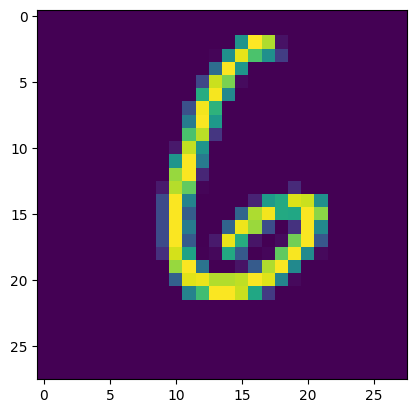

In [ ]:
# Displaying the image

plt.imshow(X_train[32])
plt.show

# print the corresponding label
print(Y_train[21])

## Image Lables

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# Unique Values in Y_train
print(np.unique(Y_train))

# Unique Values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


* We can use these labels as such or we can also apply One Hot Encoding
* All the images have same dimensions in this dataset, if not, we have to resize all the images to a common dimension.

In [ ]:
# Scaling the values

X_train = X_train/255
X_test = X_test/255

In [ ]:
# Printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Building The Neural Network¶

In [ ]:
# setting up the layers of the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid'),
])

In [ ]:
# Compiling the neural network

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# Training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2962 - accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1323 - accuracy: 0.9603
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0981 - accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786 - accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0557 - accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0479 - accuracy: 0.9841
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0373 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.032

* Accuracy of Training Data = 98.9%

## Accuracy on Test Data:

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1001 - accuracy: 0.9714
0.9714000225067139


* Accuracy of Test Data = 97.4%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


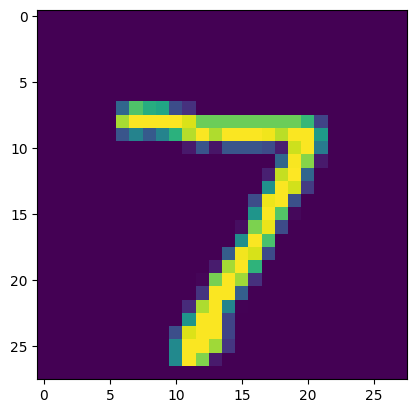

In [ ]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[3.7453719e-04 3.9705254e-05 2.7167714e-01 9.4174743e-01 8.3867184e-05
 1.8954338e-03 2.3546240e-10 9.9998987e-01 1.7935781e-02 3.0347177e-01]


* model.predict gives the prediction probability of each class for that data point

In [ ]:
# Converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# Converting the prediction probabilities to clas  label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 9, 4, 2, 0, 7, 1, 1, 2, 1, 

* Y_test --> True labels
* Y_pred_labels --> Predicted Labels


### Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 947    0    5    1    1   11    4    1    5    5]
 [   0 1110    3    1    0    1    3    1   16    0]
 [   2    3 1000    6    3    0    2    5   11    0]
 [   0    0    3  980    0   22    0    2    3    0]
 [   1    0    4    1  946    3    4    2    2   19]
 [   2    0    0    3    1  876    2    1    5    2]
 [   1    2    0    1    6   15  929    1    3    0]
 [   0    6   10    2    0    0    0 1002    3    5]
 [   1    0    3    7    3    6    1    3  945    5]
 [   0    3    0    0   10    8    1    3    5  979]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

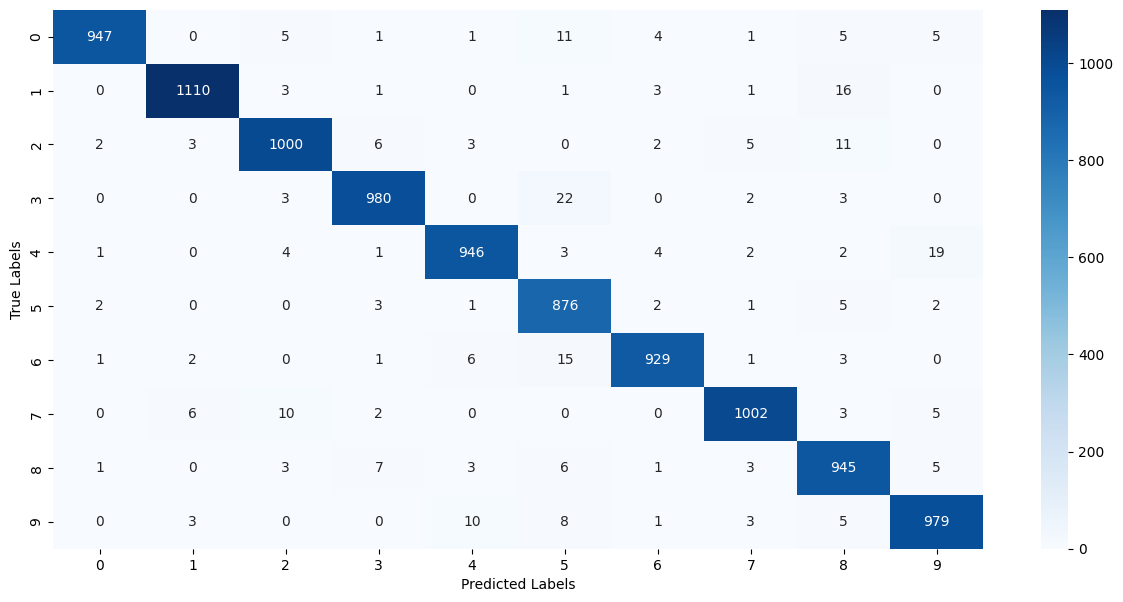

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [ ]:
input_image_path = 'Handwritten.jpeg' 
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[174 173 163]
  [175 174 164]
  [175 174 164]
  ...
  [171 172 163]
  [171 172 163]
  [171 172 163]]

 [[174 173 163]
  [175 174 164]
  [175 174 164]
  ...
  [171 172 163]
  [171 172 163]
  [171 172 163]]

 [[174 173 163]
  [175 174 164]
  [175 174 164]
  ...
  [171 172 163]
  [171 172 163]
  [171 172 163]]

 ...

 [[167 167 155]
  [166 166 154]
  [165 165 153]
  ...
  [164 165 156]
  [164 165 156]
  [164 165 156]]

 [[167 167 155]
  [167 167 155]
  [165 165 153]
  ...
  [164 165 156]
  [164 165 156]
  [164 165 156]]

 [[168 168 156]
  [167 167 155]
  [165 165 153]
  ...
  [163 164 155]
  [163 164 155]
  [163 164 155]]]


Populating the interactive namespace from numpy and matplotlib


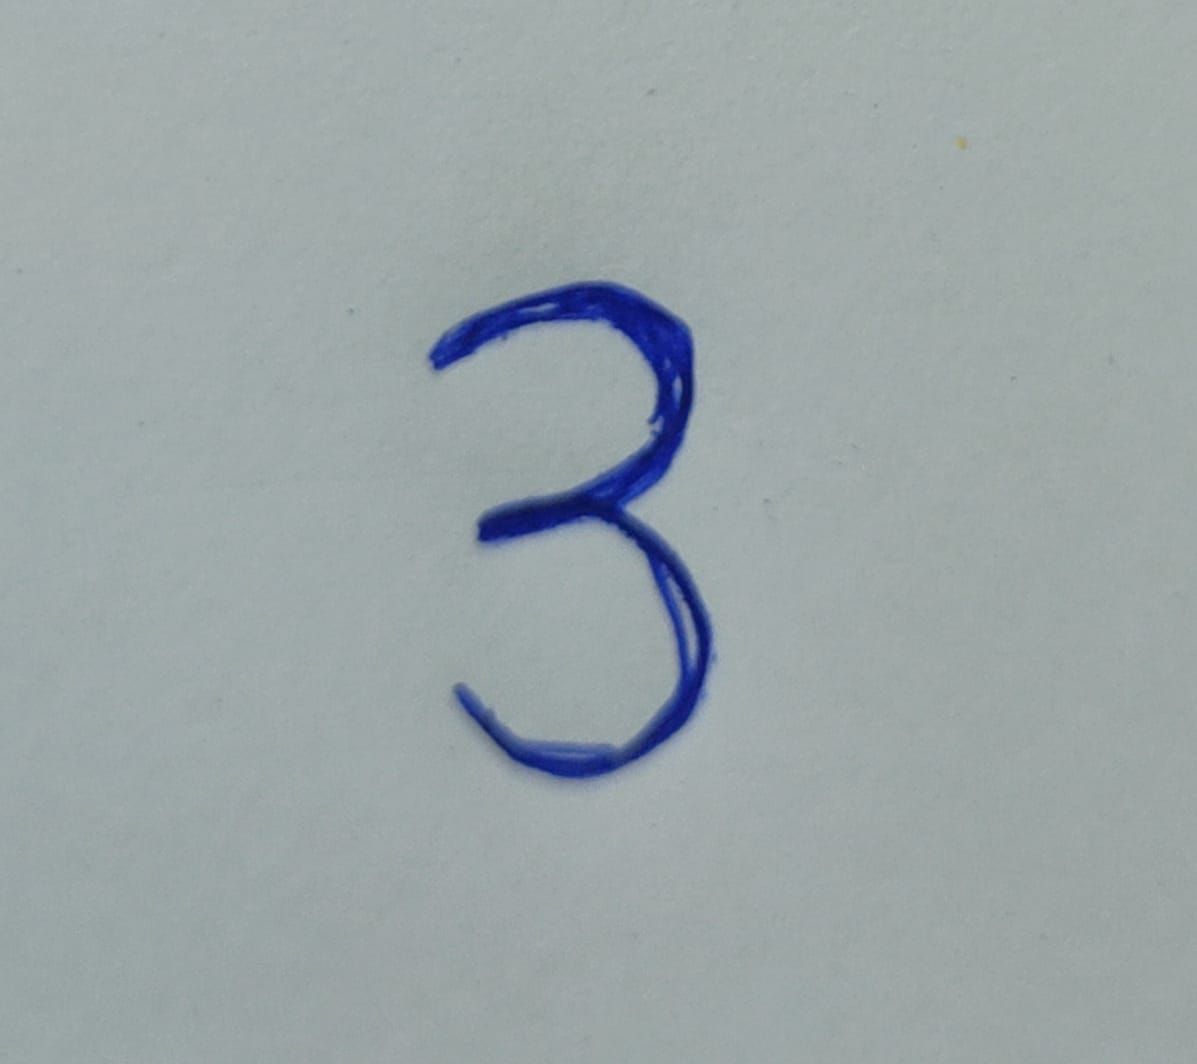

In [ ]:
get_ipython().run_line_magic('pylab', 'notebook')
cv2_imshow(input_image)

In [ ]:
input_image.shape

(1064, 1197, 3)

In [ ]:
grayscale =cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(1064, 1197)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 32ms/step
[[2.6767822e-07 1.1910484e-10 4.8164425e-06 9.9999875e-01 6.7669291e-13
  9.9830317e-01 3.1099987e-04 1.4137132e-08 8.0636823e-01 8.5510099e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3
